# Premiers tests statistiques

## Plan de la séance
- Conception d'expérience de Fisher (1933) pour la "Lady testing tea"
- Calculs de $p$-value influencés par l'expérience et non les données
- Type d'erreur I et II.
- Etude de l'effet d'un médicament (très synthétique) pour la grippe


## 1. "Lady testing tea" (Fisher 1933)

TODO 1.1 Synthétiser ici l'exposé au tableau de l'expérience de Fisher.

La **"Lady testing tea"** est une expérience en statistique dans laquelle la lady prétend pouvoir déterminer si du thé ou du lait a été ajouté en premier dans un verre. Le but de l'expérience étant de vérifier si la lady dit vrai.

**Les recettes possibles sont:**
- Verser le lait L puis le thé T.
- Verser le thé T puis le lait L.
    
**Les deux hypothèses de départ sont:**
- La lady est experte (zero erreur).
- La lady répond au hasard (hypothèse nulle $H_0$ autorisant le calcul probabiliste).

**On distingue 3 idées:**
- Idée 1: on prépare les verres selon l'odre suivant: LTTLTTL 
- Idée 2: Tirer au hasard L ou T.
- Idée 3: préparer 4T et 4L puis les mélanger

On s'intéressera à l'idée 3 afin de calculer les seuils sous $H_0$.
Le nombre de mots possibles est: $\binom{8}{4} = 70$.

**Seuil 1:** Elle trouve toutes les tasses: $\frac{1}{70}$ sous $H_0$

**Seuil 2:** Autoriser 2 erreurs: 16 configurations avec 2 erreurs donc $\frac{16}{70}$ de succès sous $H_0$.


**Seuil de signifiance:** choisi arbitrairement: 0.05

**Protocole:** Si la lady trouve la configuration des 4L et 4T alors $H_0$ peut être rejetée vers la p-value.
     

## 2. Deux calculs de $p$-value (sur les même données expérimentale)

(Cet exemple est adapté de "Statistics done wrong" de Reinhart (2015)).

Dans les deux expériences, un expérimentateur pose des questions binaires (de réponse Oui/Non) à un cobaye et note ses réponses.

L'hypothèse nulle $H_0$ est que le cobaye réponds au hasard.

Nous considérons le cas particulier mais plausible où les deux expériences donne le même résultat pour le cobaye:

$$ \mathsf{V}\mathsf{F}\mathsf{V}\mathsf{V}\mathsf{V}\mathsf{V}\mathsf{F}\mathsf{V}\mathsf{V}\mathsf{V}\mathsf{V}\mathsf{F} $$

dont la réponse est vraie ($=\mathsf{V}$) ou fausse ($=\mathsf{F}$) pour les $12$ questions posées.

Le seuil pour la signifiance est le classique $\alpha = 0.05 = \frac{1}{20}$.

__Expérience A__: L'expérimentateur pose $12$ questions.

__Expérience B__: L'expérimentateur pose des questions jusqu'à la troisième mauvaise réponse du cobaye (ou après la vingtième question).

TODO 2.1: Calculer la $p$-value pour ces deux expériences. Commentez.

In [1]:
import math

def comb(n,k):
    return math.factorial(n)/math.factorial(k)/math.factorial(n-k)

probaA = sum(comb(12,k)/2**12 for k in range(9,12+1))
probaB = sum(comb(11,f)/2**11 for f in range(2+1))

print(probaA,probaB)

0.072998046875 0.03271484375


Étant donné le seuil de signifiance $\alpha = 0.05 = \frac{1}{20}$ et une hypothèse nulle $H_0$: Le cobaye répond au hasard. On retrouve qu'avec deux expériences différentes on obtients deux p-values différentes.

En effet:
* Selon l'expérience A on n'exclue pas que le cobaye répond au hasard puisque: $P(|corrects| \ge 9) = 0.073 \ge 0.05$

* Selon l'expérience B le cobaye répond au hasard $P(|corrects| \ge 9) = 0.032 \ge 0.05$

Ainsi le type d'expérience influence la valeur de la p-value obtenue, l'expérience A n'a pas été suffisante pour exclure la possibilité que le cobaye réponds au hasard (Type 2 error) contrairement à l'expérience B.

## 3. Types d'erreur I et II

TODO3.1: Synthétiser ici la présentation au tableau.

**Type d'erreur 1:** Rejeter $H_0$ lorsqu'elle est vraie.

**Type d'erreur 2:** Ne pas rejeter $H_0$ lorsqu'elle est fausse.

## 4. Étude de l'effet d'un médicament pour la grippe

La nouvelle version de la matrice contient deux nouvelles fonctions: 

In [2]:
from the_matrix import time_length_flue_without_drug,time_length_flue_with_drug

Ces deux fonctions simulent respectivement la durée de rétablissement d'un patient grippée avec ou sans le nouveau médicament/drug que nous avons à tester.

Une cohorte est un ensemble de patients traité avec le même médicament ou placebo.

TODO4.1: Simuler par une fonction la récolte d'une cohorte de patients (on pourra donner en paramètre la fonction décrivant un traitement.

In [3]:
from typing import *

def simulate_cohort(nb_patients:int,treatement:Callable[[],float])->List[float]:
    return [treatement() for i in range(nb_patients)]

simulate_cohort(6,time_length_flue_with_drug)

[5, 1, 7, 2, 2, 6]

TODO4.2: Pour estimer l'efficacité du traitement sur une cohorte, coder (ou récupérer) le calcul des estimateurs que sont la moyenne et de la médiane.

In [4]:
from copy import deepcopy

def average(floats:List[float])->float:
    return sum(floats)/len(floats)
    
def median(floats:List[float])->float:
    L = deepcopy(floats)
    L.sort()
    return L[len(L)//2]


TODO4.3: Simuler empiriquement la loi des estimateurs en prenant de nombreuses cohortes. Pour quel(s) traitement cette simulation pourrait correspondre à des données réelles raisonnablement accessibles en pratique ?  Utiliser ces données (ou une partie) pour trouver un seuil significatif pour les estimateurs permettant de juger si le médicament à un effet positif convaincant.

In [5]:
##Initialisation  des données
nb_patients_per_cohort = 25
nb_cohorts = 100

data = [average(simulate_cohort(nb_patients_per_cohort,time_length_flue_without_drug)) for i in range(nb_cohorts)]

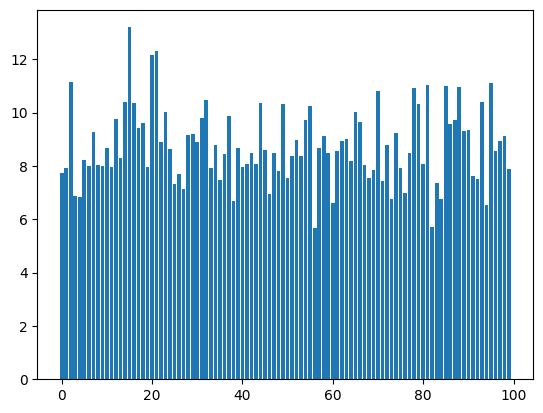

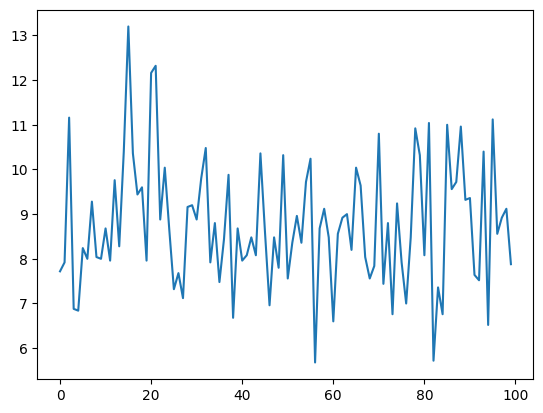

In [6]:
##Traitement des données
import matplotlib.pyplot as plt

X = [i for i in range(nb_cohorts)]
plt.bar(X,data)
plt.show()
plt.plot(X,data)
plt.show()